In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os 

In [28]:
os.listdir()

['.DS_Store',
 'Untitled.ipynb',
 'entropy',
 'gini',
 'readme.txt',
 '.ipynb_checkpoints',
 'max_val']

(array([0, 1]), array([63, 25]))
(array([0, 1]), array([66, 22]))
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        63
           1       0.64      0.56      0.60        25

    accuracy                           0.78        88
   macro avg       0.73      0.72      0.72        88
weighted avg       0.78      0.78      0.78        88

[[55  8]
 [11 14]]
====
(array([0, 1]), array([63, 25]))
(array([0, 1]), array([66, 22]))
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        63
           1       0.64      0.56      0.60        25

    accuracy                           0.78        88
   macro avg       0.73      0.72      0.72        88
weighted avg       0.78      0.78      0.78        88

[[55  8]
 [11 14]]
====
(array([0, 1]), array([63, 25]))
(array([0, 1]), array([29, 59]))
              precision    recall  f1-score   support

           0       0.86      0.40      0.54  

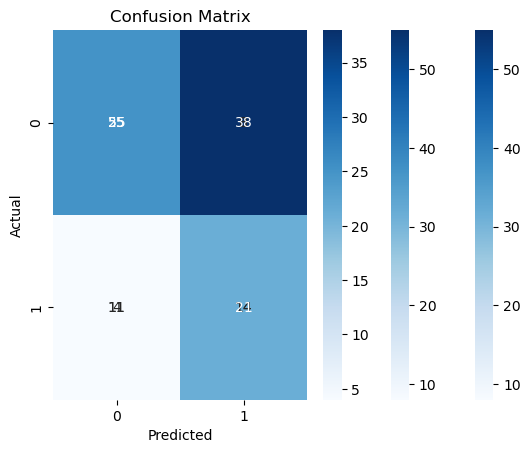

In [33]:
impurity = ['entropy', 'gini', 'max_val']
#file_name = []

for i_ in impurity:

    path = os.path.join( os.getcwd() , i_  )
    path_file = os.path.join( os.getcwd() , i_ , i_+'_test.csv'  ) 
    
    
    
    df = pd.read_csv(path_file)
    
    y_val = df.iloc[:, 0]
    y_pred = df.iloc[:, -1]
    
    print(np.unique(y_val , return_counts=True))
    print(np.unique(y_pred , return_counts=True))
    
    print( classification_report(y_val, y_pred) ) 
    
    print( confusion_matrix(y_val, y_pred) )
    print('====')
    
    
    # Calculate and print classification report
    report_dict = classification_report(y_val, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_excel(os.path.join(path, 'classification_report.xlsx'))
    
    print(report_df)
    
    
    # Plotting the confusion matrix
    categories = np.unique(y_val)  # assuming the unique categories are the same for y_val and y_pred
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    #plt.show()    
    
    # Save the PNG file
    plt.savefig(os.path.join(path, i_ + '_confusion_matrix.png'))
    
    plt.close()